In [39]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Subset, Dataset

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pathlib
import os
from PIL import Image

In [40]:
logo_path = pathlib.Path('/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data')
file_list = sorted([str(path) for path in logo_path.glob('*.png')])

for i in file_list : print(i)

/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-01.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-02.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-03.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-04.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-05.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-06.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-07.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-08.png
/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-09.png
/Users/ruthwalters/Library/CloudStora

Image shape:  (708, 690, 4)
Image shape:  (820, 682, 4)
Image shape:  (840, 674, 4)
Image shape:  (836, 676, 4)
Image shape:  (838, 676, 4)
Image shape:  (836, 676, 4)
Image shape:  (834, 670, 4)
Image shape:  (832, 680, 4)
Image shape:  (836, 670, 4)
Image shape:  (832, 666, 4)
Image shape:  (836, 684, 4)
Image shape:  (836, 674, 4)
Image shape:  (834, 674, 4)
Image shape:  (838, 672, 4)
Image shape:  (832, 672, 4)
Image shape:  (834, 670, 4)
Image shape:  (836, 678, 4)
Image shape:  (836, 676, 4)
Image shape:  (840, 680, 4)
Image shape:  (836, 670, 4)
Image shape:  (840, 656, 4)
Image shape:  (834, 662, 4)
Image shape:  (752, 702, 4)
Image shape:  (806, 674, 4)
Image shape:  (838, 682, 4)
Image shape:  (828, 694, 4)
Image shape:  (852, 668, 4)
Image shape:  (842, 678, 4)
Image shape:  (846, 680, 4)
Image shape:  (828, 688, 4)
Image shape:  (838, 676, 4)
Image shape:  (838, 694, 4)
Image shape:  (832, 682, 4)
Image shape:  (838, 676, 4)
Image shape:  (842, 678, 4)
Image shape:  (834, 

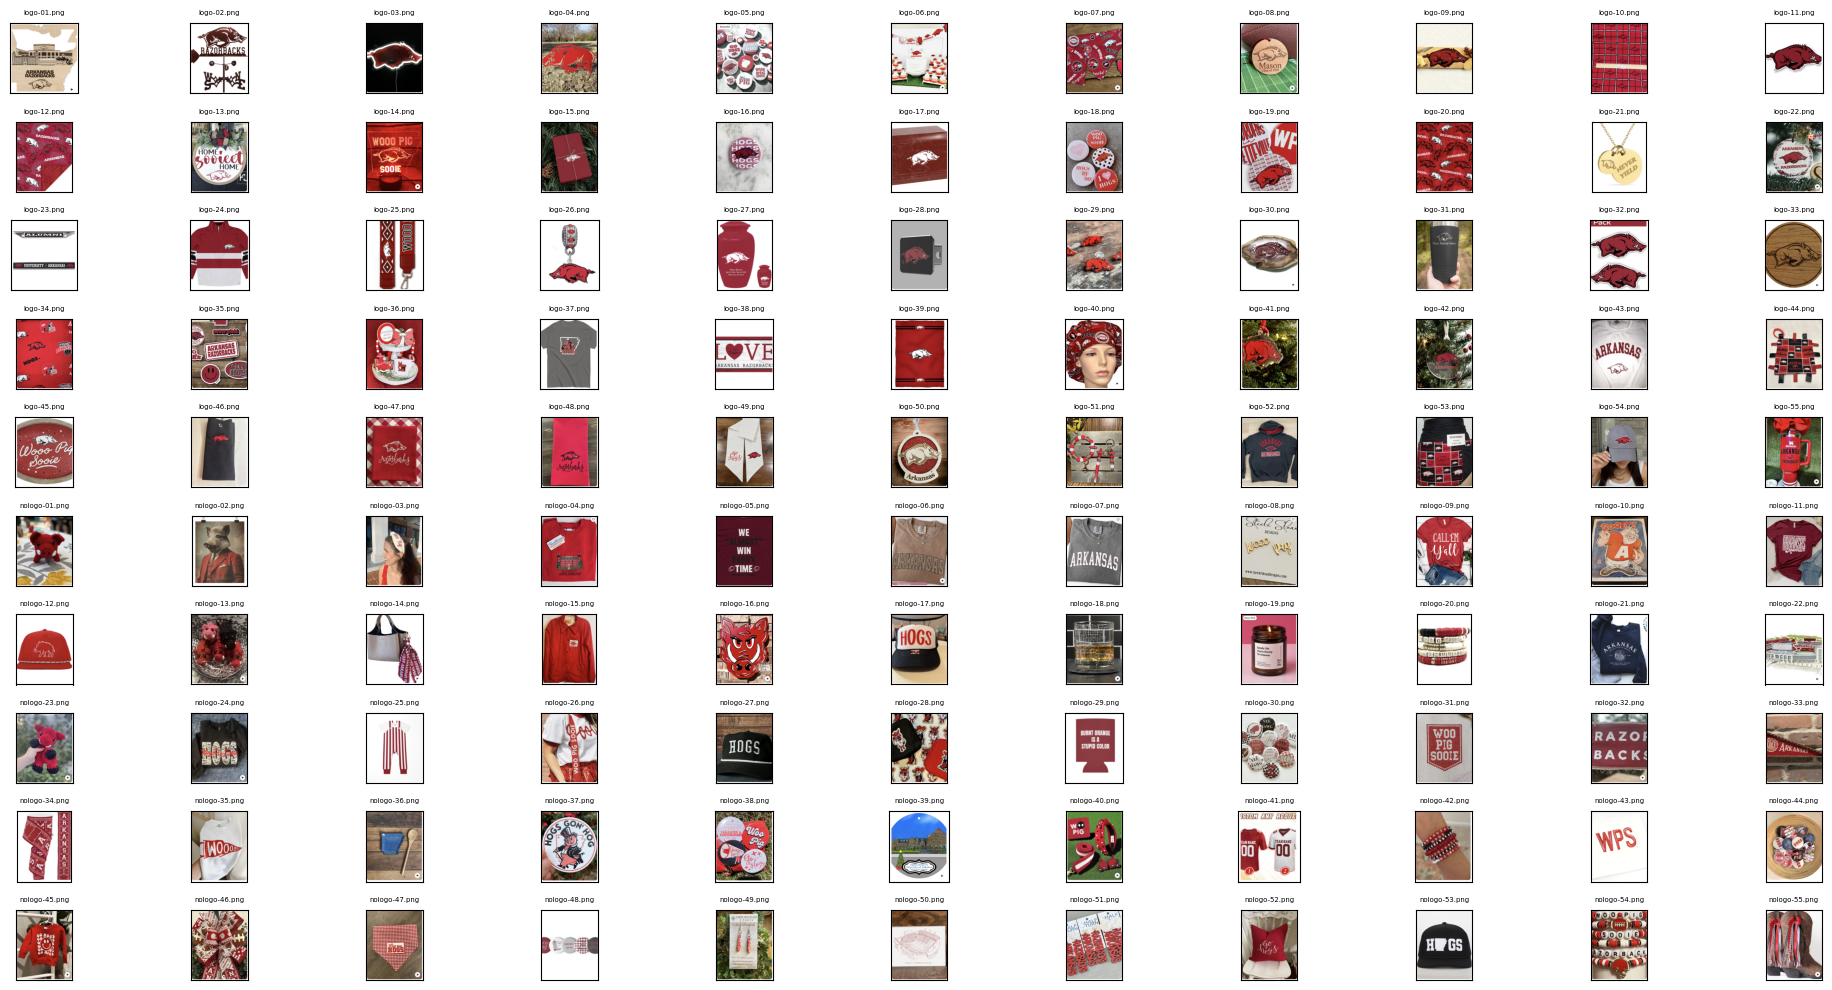

In [41]:
fig = plt.figure(figsize=(20, 10))

for i, file in enumerate(file_list):
    img = Image.open(file) # notice that we are opening the file...our list only has names not data
    print('Image shape: ', np.array(img).shape) # dimensions in pixels, pixels, color
    ax = fig.add_subplot(10, 11, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=5)

#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

In [42]:
labels = [0 if 'no' in os.path.basename(file) else 1
          for file in file_list]
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
class Joint_UDF_Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    # returns the corresponding sample to the given index
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [44]:
joint_UDF_dataset = Joint_UDF_Dataset(file_list, labels)

for item in joint_UDF_dataset:
    print(' x: ', item[0], ' y: ', item[1])

 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-01.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-02.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-03.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-04.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-05.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-06.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-07.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-08.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dro

In [45]:
img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

# initialize perform join with data
data = ImageDataset(file_list, labels, transform)

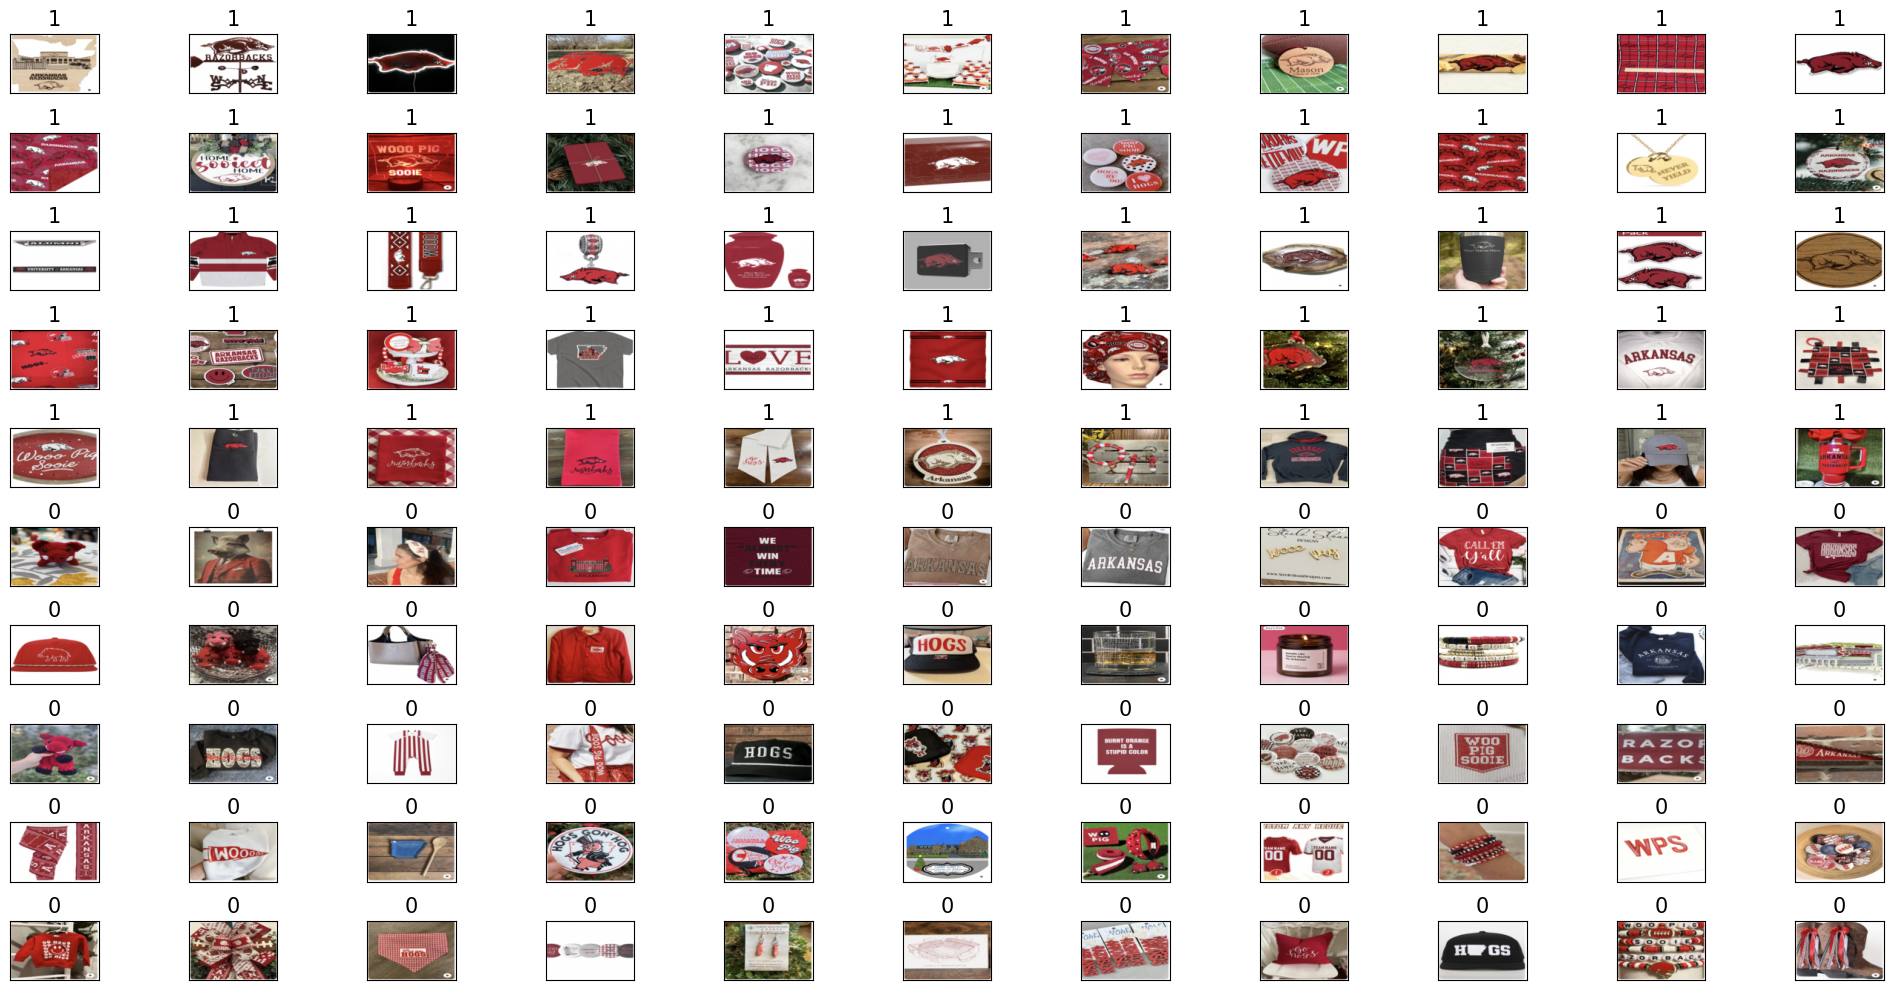

In [46]:
fig = plt.figure(figsize=(20,10))
for i, example in enumerate(data):
    ax = fig.add_subplot(10, 11, i+1)
    ax.set_xticks([]); ax.set_yticks([])

    # adding to fix warning that some values were outside [0,1] with range [0.000551827..1.0000002]
    # Clamp the tensor values to the range [0, 1] before displaying
    img_display = torch.clamp(example[0], 0, 1)

    # back to original book code
    ax.imshow(img_display.numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

In [ ]:
# Define split sizes
valid_size = 22                 # choose how many you want for validation
dataset_size = len(data)

# Ensure the split size is valid
valid_size = min(valid_size, dataset_size // 5)   # safeguard: <= 20% of dataset

torch.manual_seed(41103)

indices = torch.randperm(dataset_size)

test_size = dataset_size // 5
valid_size = dataset_size // 5

test_idx = indices[:test_size]
valid_idx = indices[test_size:test_size+valid_size]
train_idx = indices[test_size+valid_size:]

train_dataset = Subset(data, train_idx)
valid_dataset = Subset(data, valid_idx)
test_dataset  = Subset(data, test_idx)

batch_size = 8

train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_dl  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

In [ ]:
# define sequential neural network model
model = nn.Sequential()


model.add_module('conv1', nn.Conv2d(in_channels=4, out_channels=32, kernel_size=5, padding=2))

# add a ReLu activation on the convolutional layer
model.add_module('relu1', nn.ReLU())

# add a pool layer using max pool
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))

# add a second 2d convolution that takes in the data from channel 1 and uses 64 filters
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# defines the size of the input images (i.e images are forced to this)
x = torch.ones((4, 1, 28, 28))

# tells us the dimensions of x
model(x).shape

torch.Size([4, 64, 7, 7])

In [49]:
# add a flattening module to the sequence to collapse the dimensions of the 
#  tensor into a single tensor
model.add_module('flatten', nn.Flatten())

# check that the output dimensions are what you expect
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [50]:
# add the fully connected layers with regularization
model.add_module('fc1', nn.Linear(3136, 1024))

# add another activation function
model.add_module('relu3', nn.ReLU())

# add a dropout layer to interface between the hidden layer and the output layer
model.add_module('dropout', nn.Dropout(p=0.5))

# add a second fully connected layer to act as the output layer; 1024 gives 
#  input size, and 10 gives output size (i.e 0-9)
model.add_module('fc2', nn.Linear(1024, 10))

In [51]:
# use your gpu if you have one
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# iterates through every parameter and moves them from the current device (cpu) to the gpu, 
#  if available; if only cpu is available, ensures that data and model are loaded on the cpu
model = model.to(device)

In [52]:
# define loss function; CrossEntropyLoss is the preferred loss function
loss_fn = nn.CrossEntropyLoss()

# defines the optimizer we'll use (Adam), loads the parameters into the optimizer, 
#  and sets the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [53]:
# takes the architecture we previously established and stores it in a model, pulls in 
#  training and test data, and loads any other meaningful parameters

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    # for each epoch: 
    for epoch in range(num_epochs):
        
        # put the model in training mode
        model.train()
        
        # for each batch:
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            
            # forward pass
            pred = model(x_batch)

            # calculate loss
            loss = loss_fn(pred, y_batch)

            # back propagation
            loss.backward()

            # update weights
            optimizer.step()

            # reset the gradients to zero (allows us to run the gradient again)
            optimizer.zero_grad()

            # store outputs (loss, accuracy) of this batch
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        # put the model in evaluation mode
        model.eval()
        with torch.no_grad():
            # for every validation set- calculate evaluation metrics
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)
                
                # calculate and store loss
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                
                # calculate and store accuracy
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        # update user on model progress; allows user to monitor overfitting 
        #  (i.e training vs validation accuracy)
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    
    # return model and evaluation metrics
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [54]:
torch.manual_seed(1)
num_epochs = 20

# train model
hist = train(model, num_epochs, train_dl, valid_dl)

RuntimeError: Given groups=1, weight of size [32, 1, 5, 5], expected input[64, 4, 80, 120] to have 1 channels, but got 4 channels instead

In [ ]:
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '-->', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_xticks(np.arange(0,21,2))
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '-->', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_xticks(np.arange(0,21,2))
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_13.png')
plt.show()

In [ ]:
# if you're using gpu, synchronize with cpu
if device.type == 'cuda':
    torch.cuda.synchronize()
model_cpu = model.cpu()

# now that we feel good about the model, use it to preict new values; runs a forward pass on new images
pred = model(test_dataset.data.unsqueeze(1) / 255.)

# calculate accuracy on new data
is_correct = (torch.argmax(pred, dim=1) == test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean()*100:.2f}%')

In [ ]:
# visually examine model preformance; may allow us to identify common misclassifications
fig = plt.figure(figsize=(12, 12))
for i in range(144):
    ax = fig.add_subplot(12, 12, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = test_dataset[i][0][0, :, :]
    pred = model(img.unsqueeze(0).unsqueeze(1)) # alternatively: mnist_test_dataset.data[i].float()
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.85, 0.15, y_pred.item(),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

plt.show()